<a href="https://colab.research.google.com/github/2303A51798/AI-ML-2025/blob/main/2303A51798_B26_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

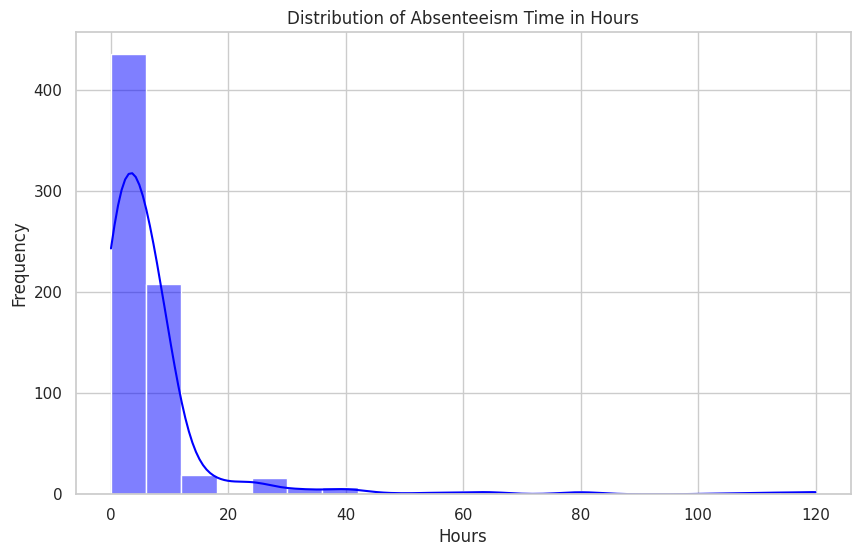

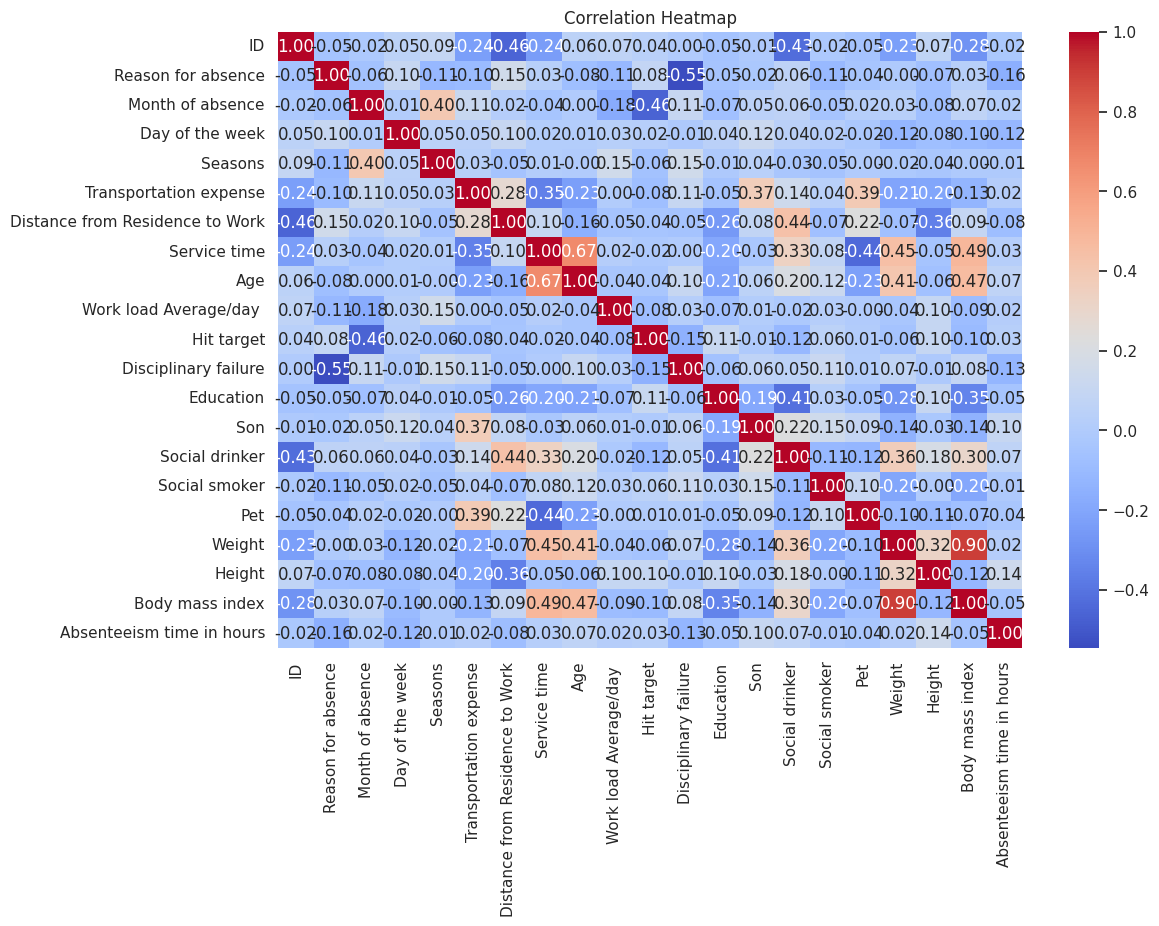

<ipython-input-10-9ce7676bf3f4>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason for absence', data=data, palette='viridis')


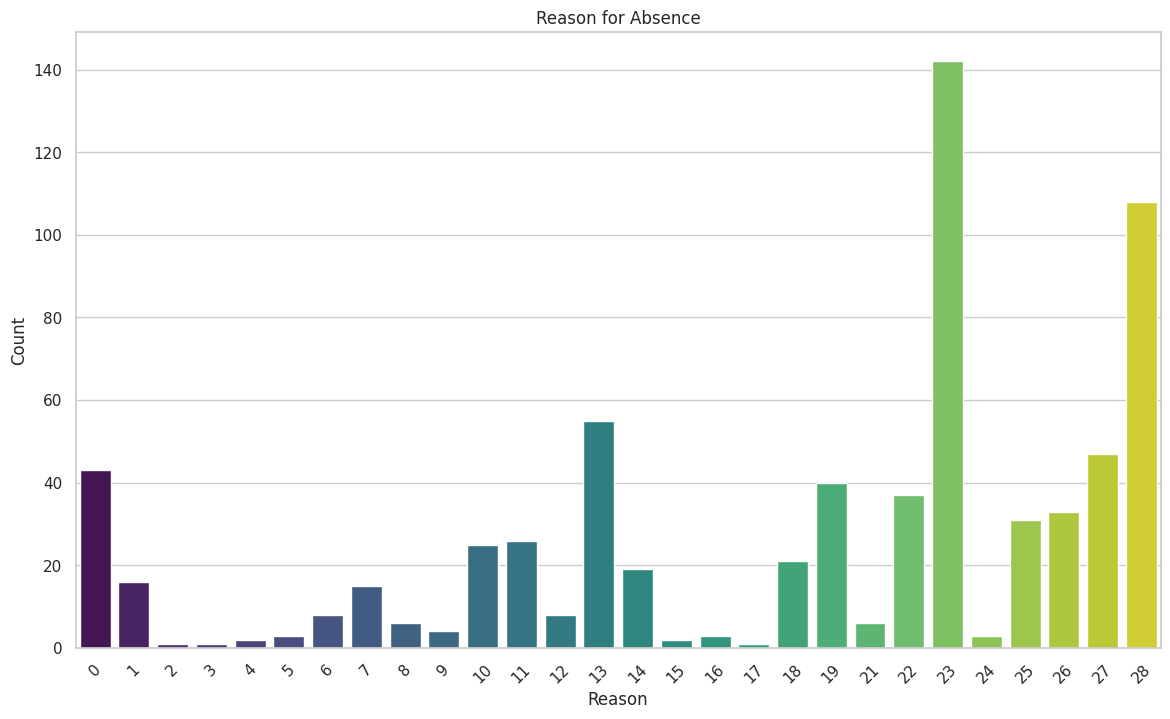

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  4  2  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  5 11  4  4  0  0  5  0  0  0  0  0  0  0]
 [ 0  1  4 10  5  0  0  2  0  0  0  0  0  0  0]
 [ 0  2  0  4  2  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  2  1  0  1  0 25  0  0  1  0  0  0  0]
 [ 0  1  0  1  0  0  0  3  0  0  0  1  0  0  0]
 [ 0  0  0  2  1  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.48      0.60      0.53        20
           2       0.52      0.38      0.44        29
           3       0.42      0.45      0.43        22
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = '/content/Absenteeism_at_work.csv'
data = pd.read_csv(file_path, delimiter=';')

print(data.info())
print(data.head())
print(data.describe())

missing_values = data.isnull().sum()
data = data.fillna(data.mean())
data = data.drop_duplicates()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Absenteeism time in hours'], kde=True, color='blue', bins=20)
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

if 'Reason for absence' in data.columns:
    plt.figure(figsize=(14, 8))
sns.countplot(x='Reason for absence', data=data, palette='viridis')
plt.title('Reason for Absence')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

X = data.drop(columns=['Absenteeism time in hours'])
y = data['Absenteeism time in hours']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
